# Test unitaire - Activité 4

---
Nom : FELLAH

Prénom : Samy

Groupe de TP :  M2 IA2S

---

> ☝ **Objectif :** Produire des représentations graphiques des résultats issus du traitement. Intégration de ces représentations dans la page Web.


Dans cette activité, nous allons mettre en valeur les données en utilisant d'une part `matplotlib` une bibliothèque complète permettant de créer des représentations graphiques en Python, et d'autre part `GeoPandas` une bibliothèque dérivée de `Pandas` pour l'analyse de données spatialisées en vue de la création de cartes à l'aide de la bilbliothèque `contextily`.

## Préambule

Avant toute chose, il faut importer les bibliothèques et modules utiles :

> ⛔ ne pas modifier le code donné ci-dessous.

In [ ]:
# importations et configuration
#

# installation des bibliothèques geopandas et contextily dans l'environnement Colab
!pip install geopandas
!pip install contextily

import sys                      # pour l'accès au commandes système
from google.colab import drive  # pour l'accès au drive
import json                     # pour manipuler le format JSON
import pandas as pd             # pour extraire, calculer, publier
import geopandas as gpd         # pour la spatialisation des données
import matplotlib.pyplot as plt # pour les graphes
import contextily as ctx        # pour l'utilisation de cartes géographiques

# montage du drive sur Colab (avec autorisation d'accès)
drive.mount('/content/drive', force_remount=True)
# cliquez sur le lien affiché dans la console afin d'obtenir votre clé d'accès
# et recopiez cette clé dans la zone de saisie de texte.

# pour inclure les fonctions "faites maison" et spécifiques
sys.path.insert(0,'/content/drive/MyDrive/micro_projet/SAE15/SAE15/tools')
import sae15_tools as tools # fonctions supports
import sae15_spec as spec   # fonctions spécifiques

Mounted at /content/drive


## Préparation des données

Il s'agit ici de réaliser les opérations suivantes :
1. lire les données statiques et dynamiques depuis l'API de Vélib' Métropole,
1. transformer les données 'stations' statiques et dynamiques en deux Data Frames (Pandas),
1. fusionner les deux Data Frames en un seul (jointure).

In [ ]:
# Fusion des deux DataFrames sur la clé 'station_id'
merged_data = pd.merge(stations_statiques_df, stations_dynamiques_df, on='station_id')

# Affichage des premières lignes du DataFrame fusionné
print("DataFrame Fusionné :")
display(merged_data.head())

DataFrame Fusionné :


station_id                           name        lat       lon  capacity  \
0    213688169  Benjamin Godard - Victor Hugo  48.865983  2.275725        35   
1    653222953      Mairie de Rosny-sous-Bois  48.871257  2.486581        30   
2  17278902806     Rouget de L'isle - Watteau  48.778193  2.396302        20   
3        36255             Toudouze - Clauzel  48.879296  2.337360        21   
4     37815204                Mairie du 12ème  48.840855  2.387555        30   

  stationCode_x rental_methods stationCode_y  num_bikes_available  \
0         16107            NaN         16107                    6   
1         31104   [CREDITCARD]         31104                   12   
2         44015            NaN         44015                    3   
3          9020   [CREDITCARD]          9020                    2   
4         12109            NaN         12109                    2   

   numBikesAvailable          num_bikes_available_types  num_docks_available  \
0                  6  [{'mechanical': 3}, {'ebike': 3}]                   29   
1                 12  [{'mechanical': 7}, {'ebike': 5}]                   13   
2                  3  [{'mechanical': 1}, {'ebike': 2}]                   17   
3                  2  [{'mechanical': 2}, {'ebike': 0}]                   19   
4                  2  [{'mechanical': 0}, {'ebike': 2}]                   28   

   numDocksAvailable  is_installed  is_returning  is_renting  last_reported  
0                 29             1             1           1     1700746107  
1                 13             1             1           1     1700746112  
2                 17             1             1           1     1700745986  
3                 19             1             1           1     1700746220  
4                 28             1             1           1     1700746241

## Spatialisation et cartographie des données

Un [GéoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) est un DataFrame qui contient une colonne qui a un statut spécial : c'est sa géometrie. Quand une fonction ou méthode spatiale est appliquée au GéoDataFrame, elle agira toujours sur la colonne définie comme étant la géométrie. On peut y accéder grâce à l’attribut `nom_du_geodataframe.geometry`.

Le code ci-dessous permet de convertir le DataFrame des stations en GéoDataFrame :

In [ ]:
# Convert the longitude and latitude to a format recognized by geoPandas
geom = gpd.points_from_xy(merged_data["lon"], merged_data["lat"])

# Create a DataFrame with a geometry containing the Points
geo_data = gpd.GeoDataFrame(merged_data, crs="EPSG:4326", geometry=geom)
display(geo_data)

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1465     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1466     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1467    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1468    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1469    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode_x rental_methods stationCode_y  \
0           35         16107            NaN         16107   
1           30         31104   [CREDITCARD]         31104   
2           20         44015            NaN         44015   
3           21          9020   [CREDITCARD]          9020   
4           30         12109            NaN         12109   
...        ...           ...            ...           ...   
1465        35         18023   [CREDITCARD]         18023   
1466        35         18026   [CREDITCARD]         18026   
1467        35         18024   [CREDITCARD]         18024   
1468        25         42004   [CREDITCARD]         42004   
1469        67          8004   [CREDITCARD]          8004   

      num_bikes_available  numBikesAvailable  \
0                       6                  6   
1                      12                 12   
2                       3                  3   
3                       2                  2   
4                       2                  2   
...                   ...                ...   
1465                    5                  5   
1466                    0                  0   
1467                    1                  1   
1468                   25                 25   
1469                   75                 75   

                num_bikes_available_types  num_docks_available  \
0       [{'mechanical': 3}, {'ebike': 3}]                   29   
1       [{'mechanical': 7}, {'ebike': 5}]                   13   
2       [{'mechanical': 1}, {'ebike': 2}]                   17   
3       [{'mechanical': 2}, {'ebike': 0}]                   19   
4       [{'mechanical': 0}, {'ebike': 2}]                   28   
...                                   ...                  ...   
1465    [{'mechanical': 1}, {'ebike': 4}]                   29   
1466    [{'mechanical': 0}, {'ebike': 0}]                   32   
1467    [{'mechanical': 0}, {'ebike': 1}]                   33   
1468   [{'mechanical': 19}, {'ebike': 6}]                    9   
1469  [{'mechanical': 42}, {'ebike': 33}]                    1   

      numDocksAvailable  is_installed  is_returning  is_renting  \
0                    29             1             1           1   
1                    13             1             1           1   
2                    17             1             1           1   
3                    19             1             1           1   
4                    28             1             1           1   
...                 ...           ...           ...         ...   
1465                 29             1             1           1   
1466                 32             1             1           1   
1467                 33             1             1           1   
1468                  9             1             1           1   
1469                  1             1             1           1   

      last_reported                  geometry  
0        1700746107  POINT (2.27572 48.86598)  
1        1700746112  POINT (2.

L'acronyme `crs` signifie Coordinate Reference System, c'est une indication du système de projection utilisé. En regardant la documentation Vélib, on voit que le référentiel de projection utilisé est `WGS84`. C'est le système de projection le plus commun aujourd'hui et il est notamment utilisé par les systèmes de positionnement par satellite GPS. Ce système est référencé `4326` en deux dimensions (X,Y) et `4979` en trois dimensions (X,Y,Z) selon la liste des codes `EPSG`, et c'est ce que nous donnons comme indication à notre GeoDataFrame.

⚠ L'exportation du DataFrame vers un GeoDataFrame fait l'objet d'une fonction support que vous pouvez utiliser :

In [ ]:
geo_data = tools.exportToGeoDF(merged_data)
display(geo_data)

station_id                                   name        lat       lon  \
0       213688169          Benjamin Godard - Victor Hugo  48.865983  2.275725   
1       653222953              Mairie de Rosny-sous-Bois  48.871257  2.486581   
2     17278902806             Rouget de L'isle - Watteau  48.778193  2.396302   
3           36255                     Toudouze - Clauzel  48.879296  2.337360   
4        37815204                        Mairie du 12ème  48.840855  2.387555   
...           ...                                    ...        ...       ...   
1465     54000604                 Ordener - Poissonniers  48.891214  2.351289   
1466     43247738                     Ruisseau - Ordener  48.892995  2.340145   
1467    102311820                 Clignancourt - Ordener  48.891458  2.348636   
1468    368766689  Westermeyer - Paul Vaillant-Couturier  48.819116  2.396664   
1469    315022587    Malesherbes - Place de la Madeleine  48.870406  2.323244   

      capacity stationCode_x rental_methods stationCode_y  \
0           35         16107            NaN         16107   
1           30         31104   [CREDITCARD]         31104   
2           20         44015            NaN         44015   
3           21          9020   [CREDITCARD]          9020   
4           30         12109            NaN         12109   
...        ...           ...            ...           ...   
1465        35         18023   [CREDITCARD]         18023   
1466        35         18026   [CREDITCARD]         18026   
1467        35         18024   [CREDITCARD]         18024   
1468        25         42004   [CREDITCARD]         42004   
1469        67          8004   [CREDITCARD]          8004   

      num_bikes_available  numBikesAvailable  \
0                       6                  6   
1                      12                 12   
2                       3                  3   
3                       2                  2   
4                       2                  2   
...                   ...                ...   
1465                    5                  5   
1466                    0                  0   
1467                    1                  1   
1468                   25                 25   
1469                   75                 75   

                num_bikes_available_types  num_docks_available  \
0       [{'mechanical': 3}, {'ebike': 3}]                   29   
1       [{'mechanical': 7}, {'ebike': 5}]                   13   
2       [{'mechanical': 1}, {'ebike': 2}]                   17   
3       [{'mechanical': 2}, {'ebike': 0}]                   19   
4       [{'mechanical': 0}, {'ebike': 2}]                   28   
...                                   ...                  ...   
1465    [{'mechanical': 1}, {'ebike': 4}]                   29   
1466    [{'mechanical': 0}, {'ebike': 0}]                   32   
1467    [{'mechanical': 0}, {'ebike': 1}]                   33   
1468   [{'mechanical': 19}, {'ebike': 6}]                    9   
1469  [{'mechanical': 42}, {'ebike': 33}]                    1   

      numDocksAvailable  is_installed  is_returning  is_renting  \
0                    29             1             1           1   
1                    13             1             1           1   
2                    17             1             1           1   
3                    19             1             1           1   
4                    28             1             1           1   
...                 ...           ...           ...         ...   
1465                 29             1             1           1   
1466                 32             1             1           1   
1467                 33             1             1           1   
1468                  9             1             1           1   
1469                  1             1             1           1   

      last_reported                  geometry  
0        1700746107  POINT (2.27572 48.86598)  
1        1700746112  POINT (2.

À ce stade, GeoPandas connait la geometry de nos données, c'est-à-dire comment elles s'agencent dans l'espace. Il ne nous reste plus qu'à afficher les données à l'aide de la méthode `plot()` :

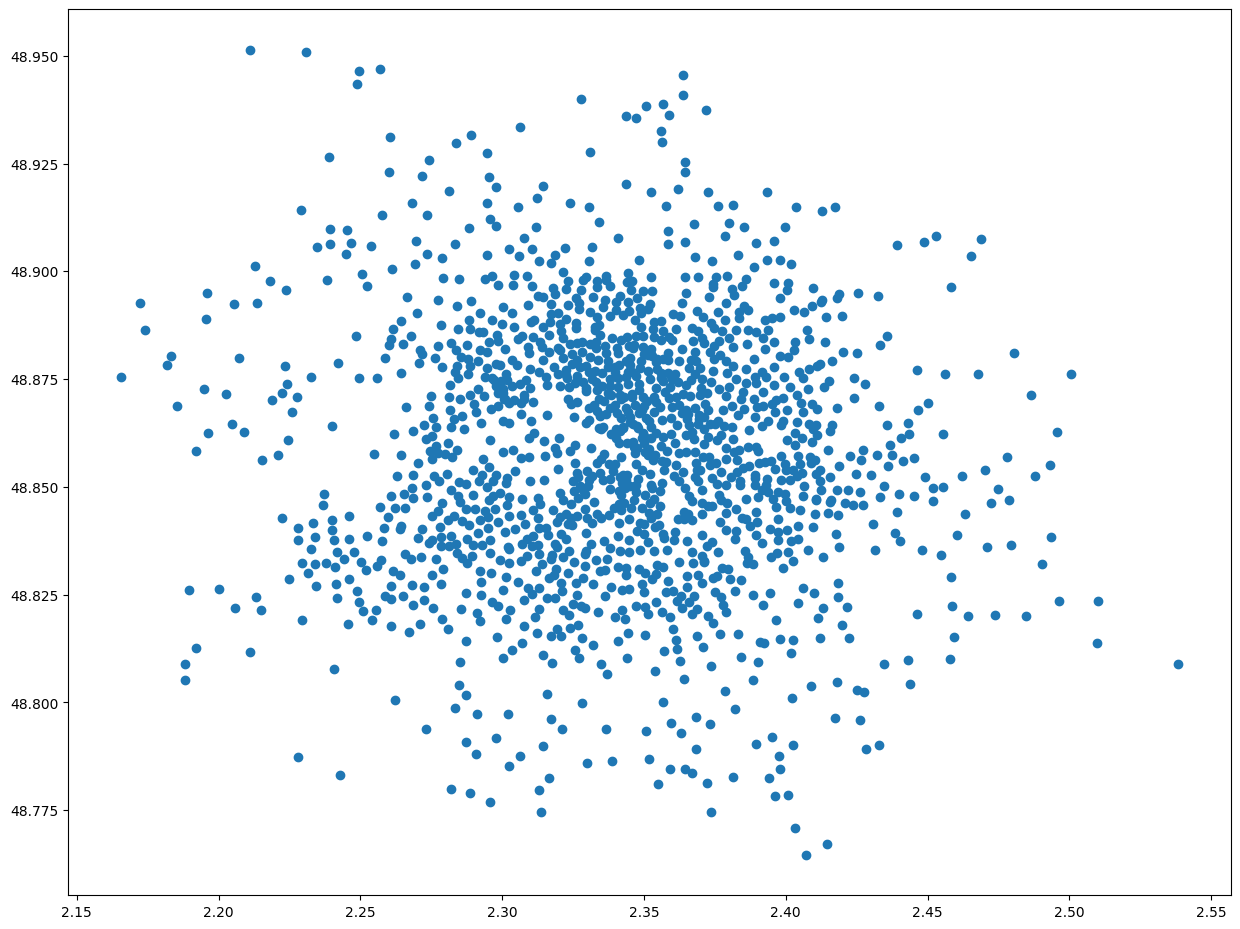

In [ ]:
geo_data.plot(figsize=(15, 15));

Demandons à GeoPandas de changer la taille de nos marqueurs en fonction de la capacité de chaque station :

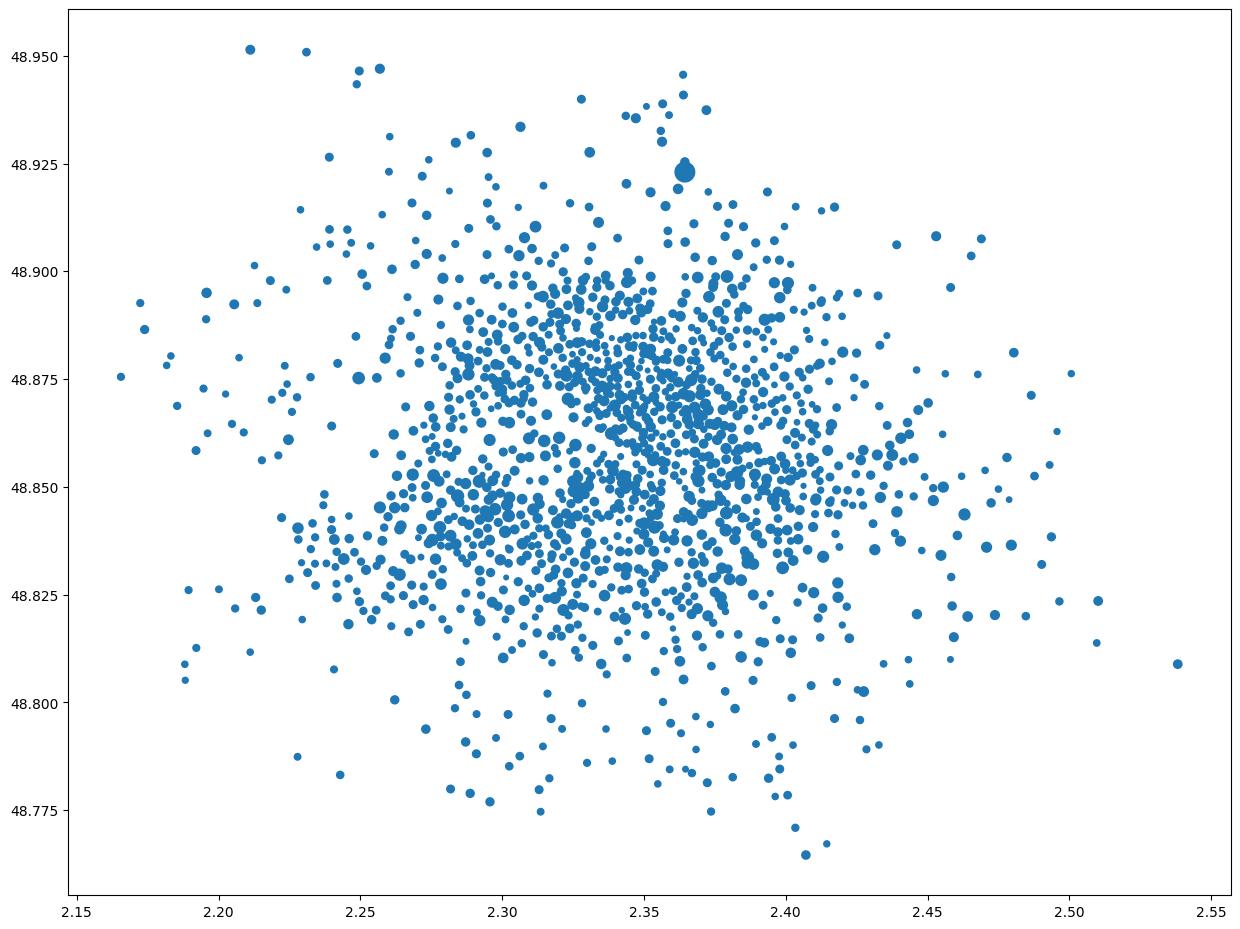

In [ ]:
geo_data.plot(markersize=geo_data.capacity, figsize=(15, 15));

Ou encore, de changer la taille de nos marqueurs en fonction du nombre de vélibs dans la station :

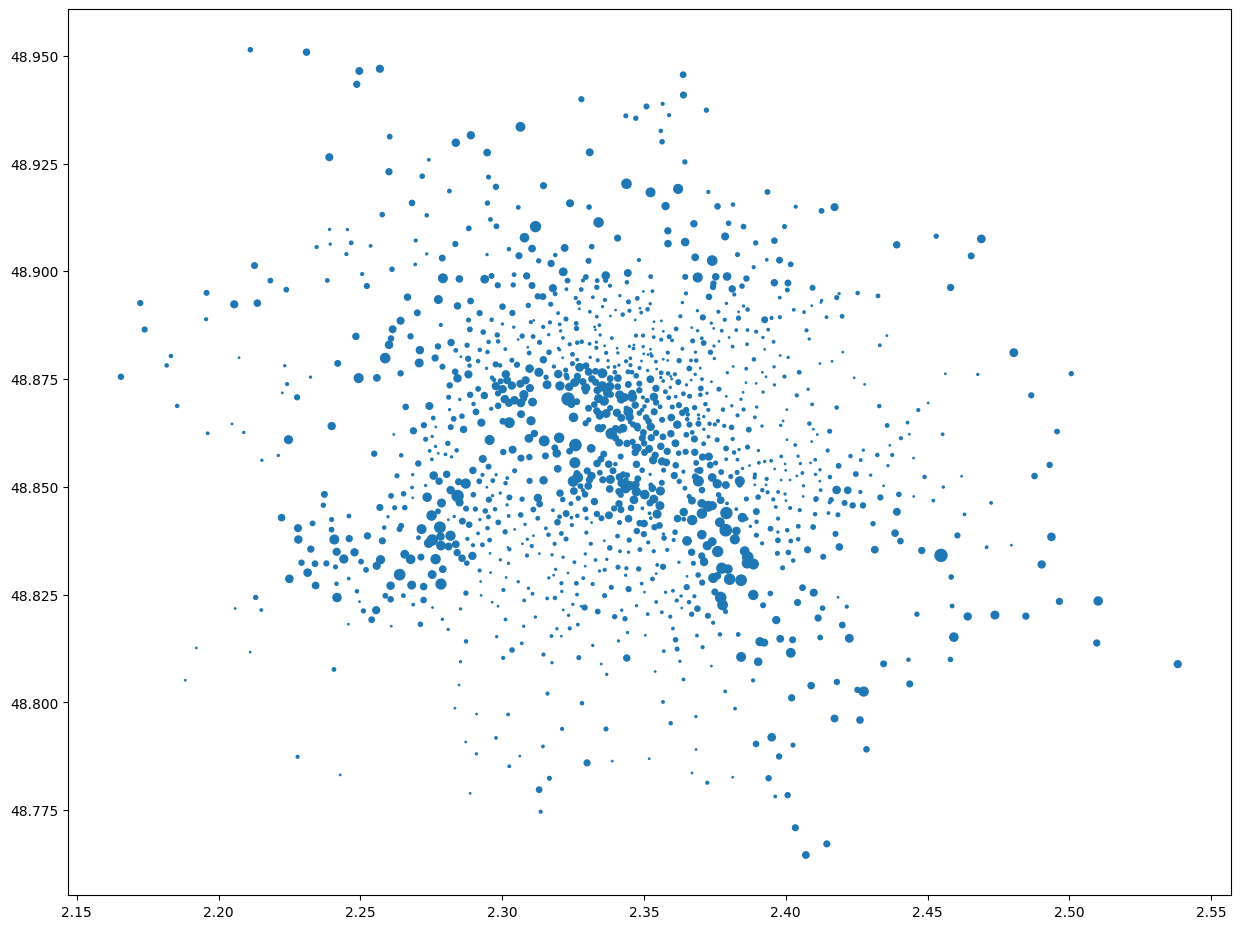

In [ ]:
geo_data.plot(markersize=geo_data.num_bikes_available, figsize=(15, 15));

On se représente déjà mieux la distribution du nombre de vélibs dans Paris ! Mais au lieu de jouer uniquement avec la taille des marqueurs, on peut aussi varier leur couleur en spécifiant une carte de couleur `cmap` :

> les différentes cartes des couleurs peuvent être consulter ici [matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

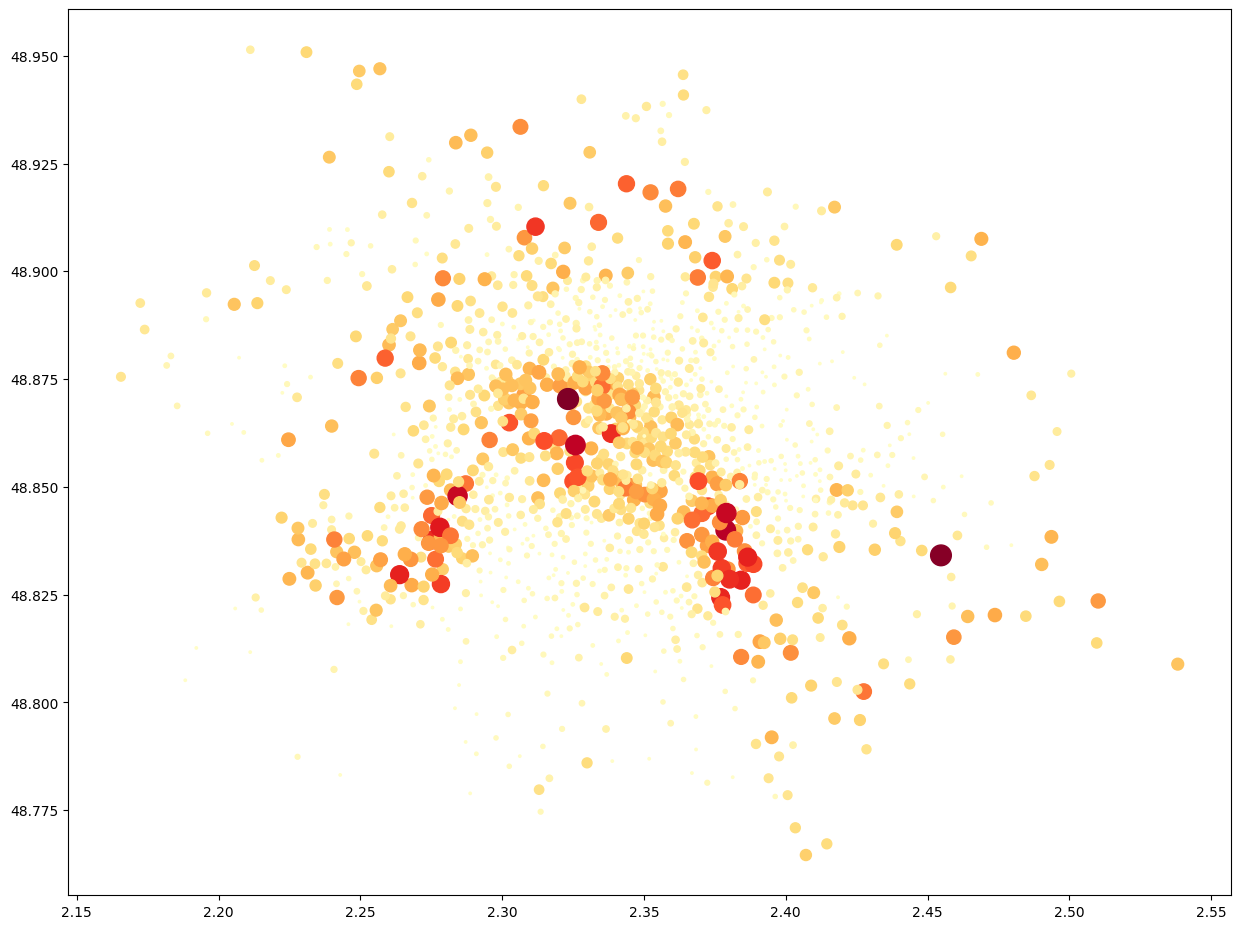

In [ ]:
# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# affichage forçé
plt.show()

Maintenant nous allons pouvoir ajouter un fond de carte provenant, par exemple, de [OpenStreetMap](https://www.openstreetmap.fr/). Il existe un module python pour faire ça en une ligne et ce module s'appelle `contextily`. Le seul pré-requis est de convertir les coordonnées GPS au format EPSG:3857, mais GeoPandas fait ça très bien :

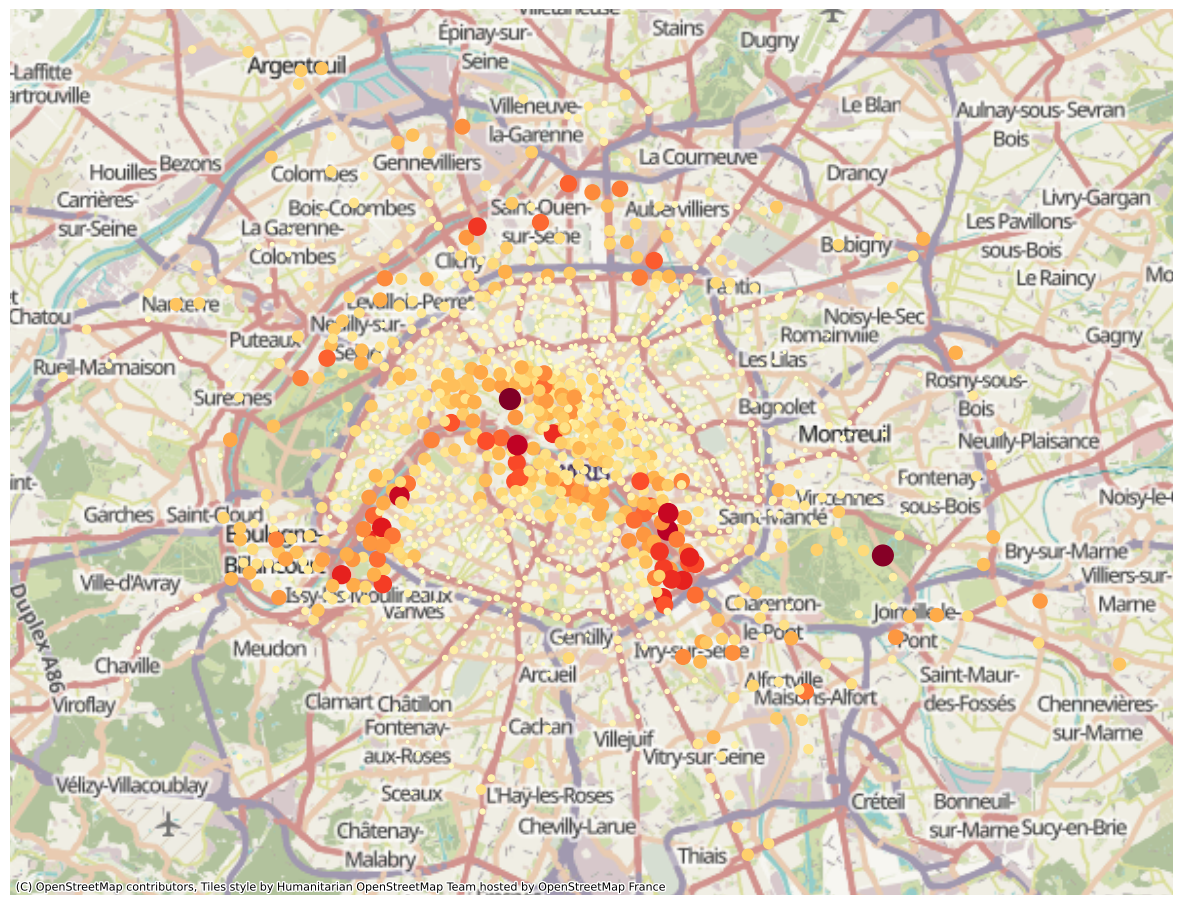

In [ ]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes)

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# affichage forçé
plt.show()

## Exportation des représentations

Il s'agit ici d'exporter les représentations graphiques obtenues sous forme d'images sauvegardées dans un dossier sur le Drive.

Ce dossier est `/SAE15/web/data/` présent dans l'arborescence de votre projet.

Les images, sauvegardées dans cet emplacement, seront intégrées automatiquement dans la page Web `projetSAE15.html`, page de publication des résultats de l'analyse des données Vélib.

Le code suivant montre de quelle manière opérer une telle sauvegarde après avoir affiché une figure :


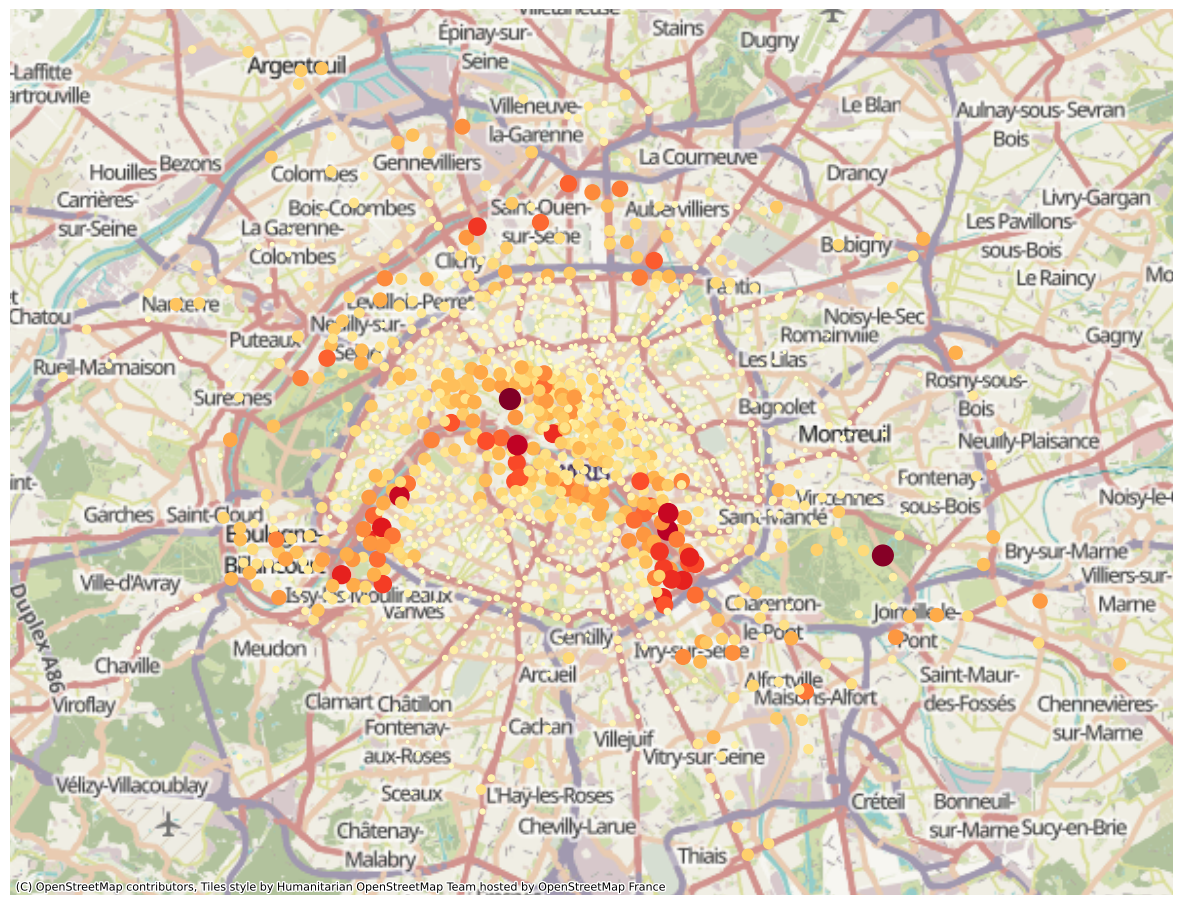

In [ ]:
# conversion de coordonnées : contextily utilise les coordonnées EPSG:3857
geo_data_with_map = geo_data.to_crs(epsg=3857)

# figure et axes graphiques
f, axes = plt.subplots(1, figsize=(15,15))

# affichage des stations gélocalisés
geo_data_with_map.plot(geo_data.num_bikes_available, markersize=3*geo_data.num_bikes_available, cmap="YlOrRd", ax=axes);

# effacement des axes gradués
axes.set_axis_off()

# ajout du fond de carte correspondant aux coordonnées géographiques des stations
ctx.add_basemap(axes)

# sauvegarde de la figure courante sur le Drive au format SVG (vectoriel)
plt.savefig('/content/drive/MyDrive/micro_projet/SAE15/SAE15/web/data/carte1.svg')

# affichage forçé
plt.show()

## Générez votre propre carte

On vous demande de générer votre propre carte des stations Vélib géolocalisées afin de représenter une information de votre choix (capacité des stations, stands disponibles, taux de disponibilité des vélos ou des stands,...).

> On pourra également ajouter un titre (méthode `title` pour les axes) avec la date de dernière mise à jour des données (fonction spécifique `sae15_spec.getLatestDate()`).

> Il est également possible de représenter deux types d'informations sur une même carte en jouant avec la taille des points d'une part et, d'autre part avec leur couleur.

⚠ Vérifier la bonne exportation de la carte vers le dossier destination `SAE15/web/data/`.

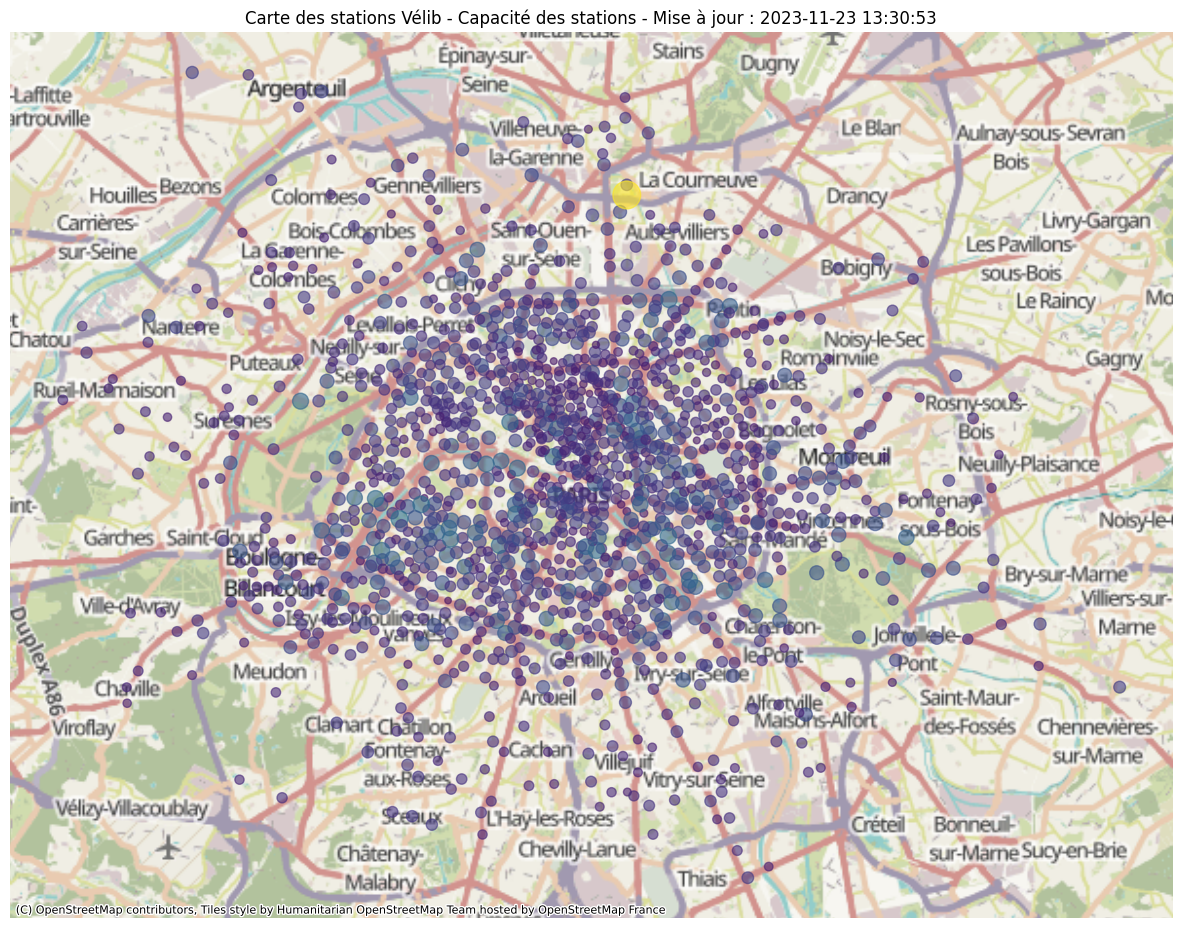

In [ ]:
# Capacité des stations
geo_data_with_map = geo_data.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(15, 15))

geo_data_with_map.plot(ax=ax, markersize=2*geo_data['capacity'],
                       column='capacity', cmap="viridis", alpha=0.6)

# Effacement des axes gradués
ax.set_axis_off()

# Ajout du fond de carte
ctx.add_basemap(ax)

date_maj = spec.getLatestDate(geo_data)
ax.set_title(f"Carte des stations Vélib - Capacité des stations - Mise à jour : {date_maj}")

plt.savefig('/content/drive/MyDrive/micro_projet/SAE15/SAE15/web/data/carte_capacite_stations.svg')

# Affichage de la carte
plt.show()


---
🎯  Livrer ce test unitaire sur Eprel en fin de séance

---



